## Multivariate Regression

In [28]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
#import featuretools as ft
#https://docs.featuretools.com/index.html

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_pickle('listings_features_2.pkl')
df2 = pd.read_pickle('listings_features_2_2.pkl')

In [6]:
df2.columns

Index(['host_id', 'host_response_rate', 'host_listings_count',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'number_of_reviews', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'reviews_per_month',
       'dist_from_center', 'property_type_clean', 'parking', 'price_log',
       'price_RobustScaler', 'parking_num'],
      dtype='object')

In [ ]:
#X = df_adv[['One', 'Two']] y = df_adv['Target']

#X = sm.add_constant(X)
#est = sm.OLS(y, X).fit()
#est.summary()

In [10]:
df3 = df2[['price_log','accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'number_of_reviews','dist_from_center','parking_num']]

In [11]:
df3

,price_log,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,dist_from_center,parking_num
93,5.703782,5,2.0,3.0,3.0,300.0,500.0,120.0,1,0.0,77,8.110743,1.0
96,5.247024,2,2.0,1.0,1.0,190.0,0.0,0.0,2,195.0,0,20.732847,1.0
102,5.010635,7,2.0,4.0,4.0,150.0,1000.0,80.0,8,0.0,34,11.801559,1.0
116,4.653960,2,1.0,1.0,1.0,105.0,0.0,35.0,2,10.0,337,5.564052,0.0
144,4.941642,6,1.0,3.0,3.0,140.0,100.0,50.0,1,25.0,27,5.881810,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83802,4.905275,7,2.0,3.0,4.0,135.0,0.0,0.0,1,0.0,0,21.568359,1.0
83827,6.177944,2,1.0,1.0,1.0,482.0,0.0,0.0,1,0.0,0,6.184869,1.0
83829,6.249975,2,1.0,1.0,1.0,518.0,0.0,0.0,1,0.0,0,1.488672,1.0
83834,5.438079,8,1.0,3.0,3.0,230.0,0.0,0.0,1,0.0,0,7.686533,1.0


In [12]:
train_dataset = df3.sample(frac=0.8,random_state=0)
test_dataset = df3.drop(train_dataset.index)

In [13]:
train_labels = train_dataset.pop('price_log')
test_labels = test_dataset.pop('price_log')

In [16]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [17]:
model = build_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [22]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[26.63799 ],
       [12.774616],
       [17.553413],
       [19.425325],
       [25.605038],
       [75.09574 ],
       [35.120117],
       [55.10475 ],
       [48.64564 ],
       [10.549649]], dtype=float32)

In [23]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [24]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.002169,0.029044,0.002169,0.002518,0.041896,0.002518,995
996,0.002224,0.030609,0.002224,0.001674,0.021615,0.001674,996
997,0.002210,0.029982,0.002210,0.003559,0.032676,0.003559,997
998,0.001907,0.028620,0.001907,0.001864,0.031821,0.001864,998
999,0.002461,0.028760,0.002461,0.000995,0.017821,0.000995,999


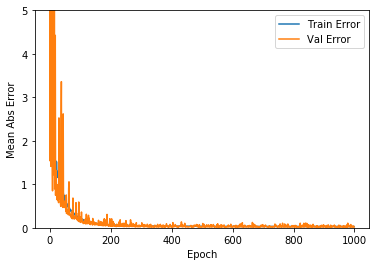

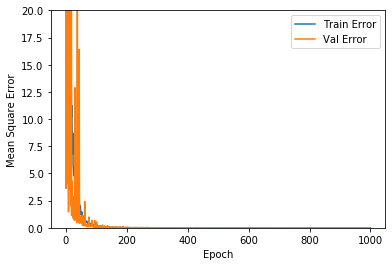

In [34]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)


........................

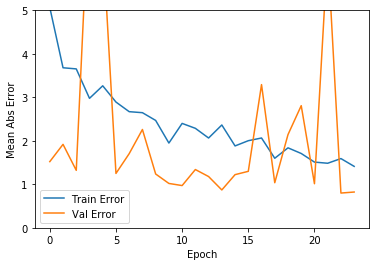

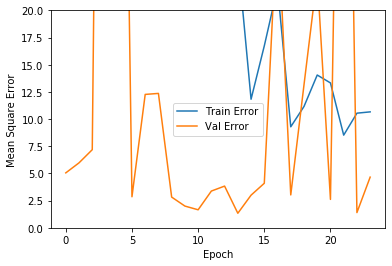

In [36]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [40]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print(f"Testing set Mean Abs Error: {mae} for price_log")

1202/1202 - 0s - loss: 1.6093 - mean_absolute_error: 0.7667 - mean_squared_error: 1.6093
Testing set Mean Abs Error: 0.7667402625083923 for price_log


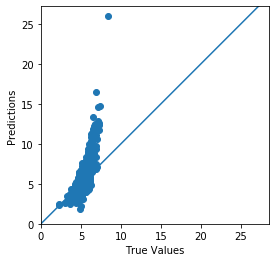

In [41]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Need to try logarithmic regression instead of